# **Supervised Learning**  
- Regression
- Classification

# **Regression Algorithm**

Regression algorithms are a set of machine learning techniques used for predicting a continuous output or dependent variable based on one or more independent variables. These algorithms are widely used in various fields such as finance, economics, healthcare, and marketing to model relationships and make predictions. Here are some commonly used regression algorithms:

### **1. Linear Regression**
**Description**:
Linear regression is the simplest and most commonly used regression algorithm. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.




## **Ecommerce Dataset**

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### **Features in E-Commerce Datasets**

1. **Avg. Session Length**: The average duration of a session on the website.
2. **Time on App**: The average time a user spends on the mobile app.
3. **Time on Website**: The average time a user spends on the website.
4. **Length of Membership**: The duration of the user's membership.
5. **Yearly Amount Spent**: The total amount spent by the user in a year.



In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
#file_path = '/content/drive/My Drive/Ecommerce_Dataset/Ecommerce_Customers'

In [13]:
ecommerce_data = pd.read_csv("Ecommerce_Customers.csv")


In [15]:
# Summary statistics
summary_stats = ecommerce_data.describe()
print("Summary Statistics:\n")
summary_stats


Summary Statistics:



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [17]:
ecommerce_data_n = ecommerce_data.select_dtypes(exclude=['object','category'])

# Correlation matrix
corr_matrix = ecommerce_data_n.corr()
print("\nCorrelation Matrix:\n")
corr_matrix


Correlation Matrix:



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


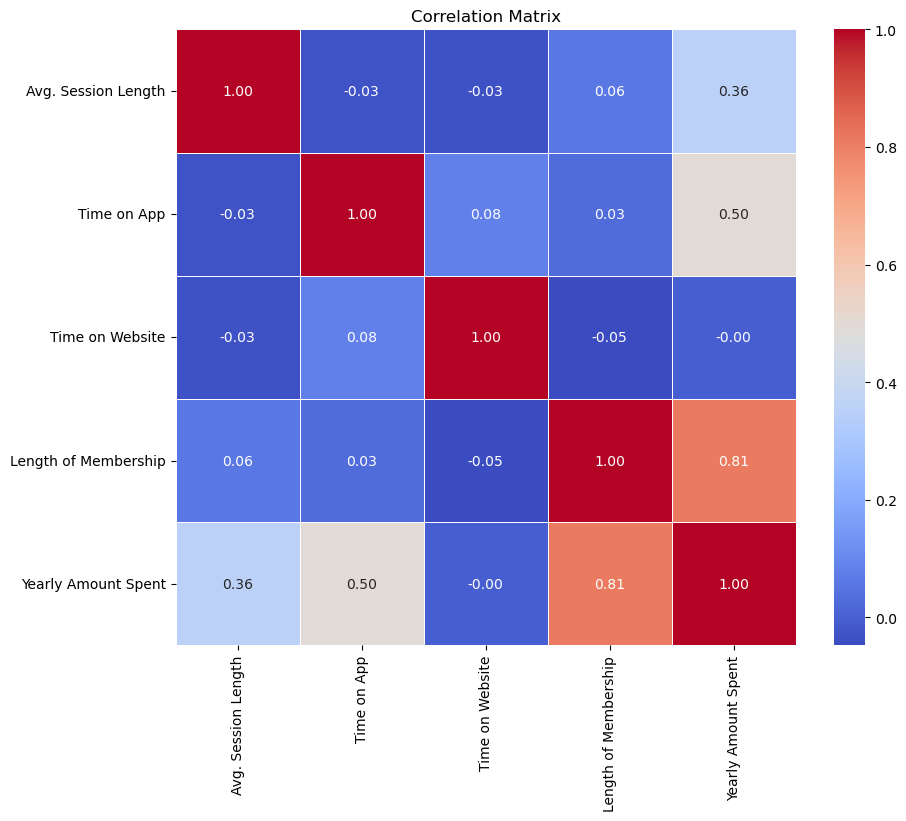

In [19]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

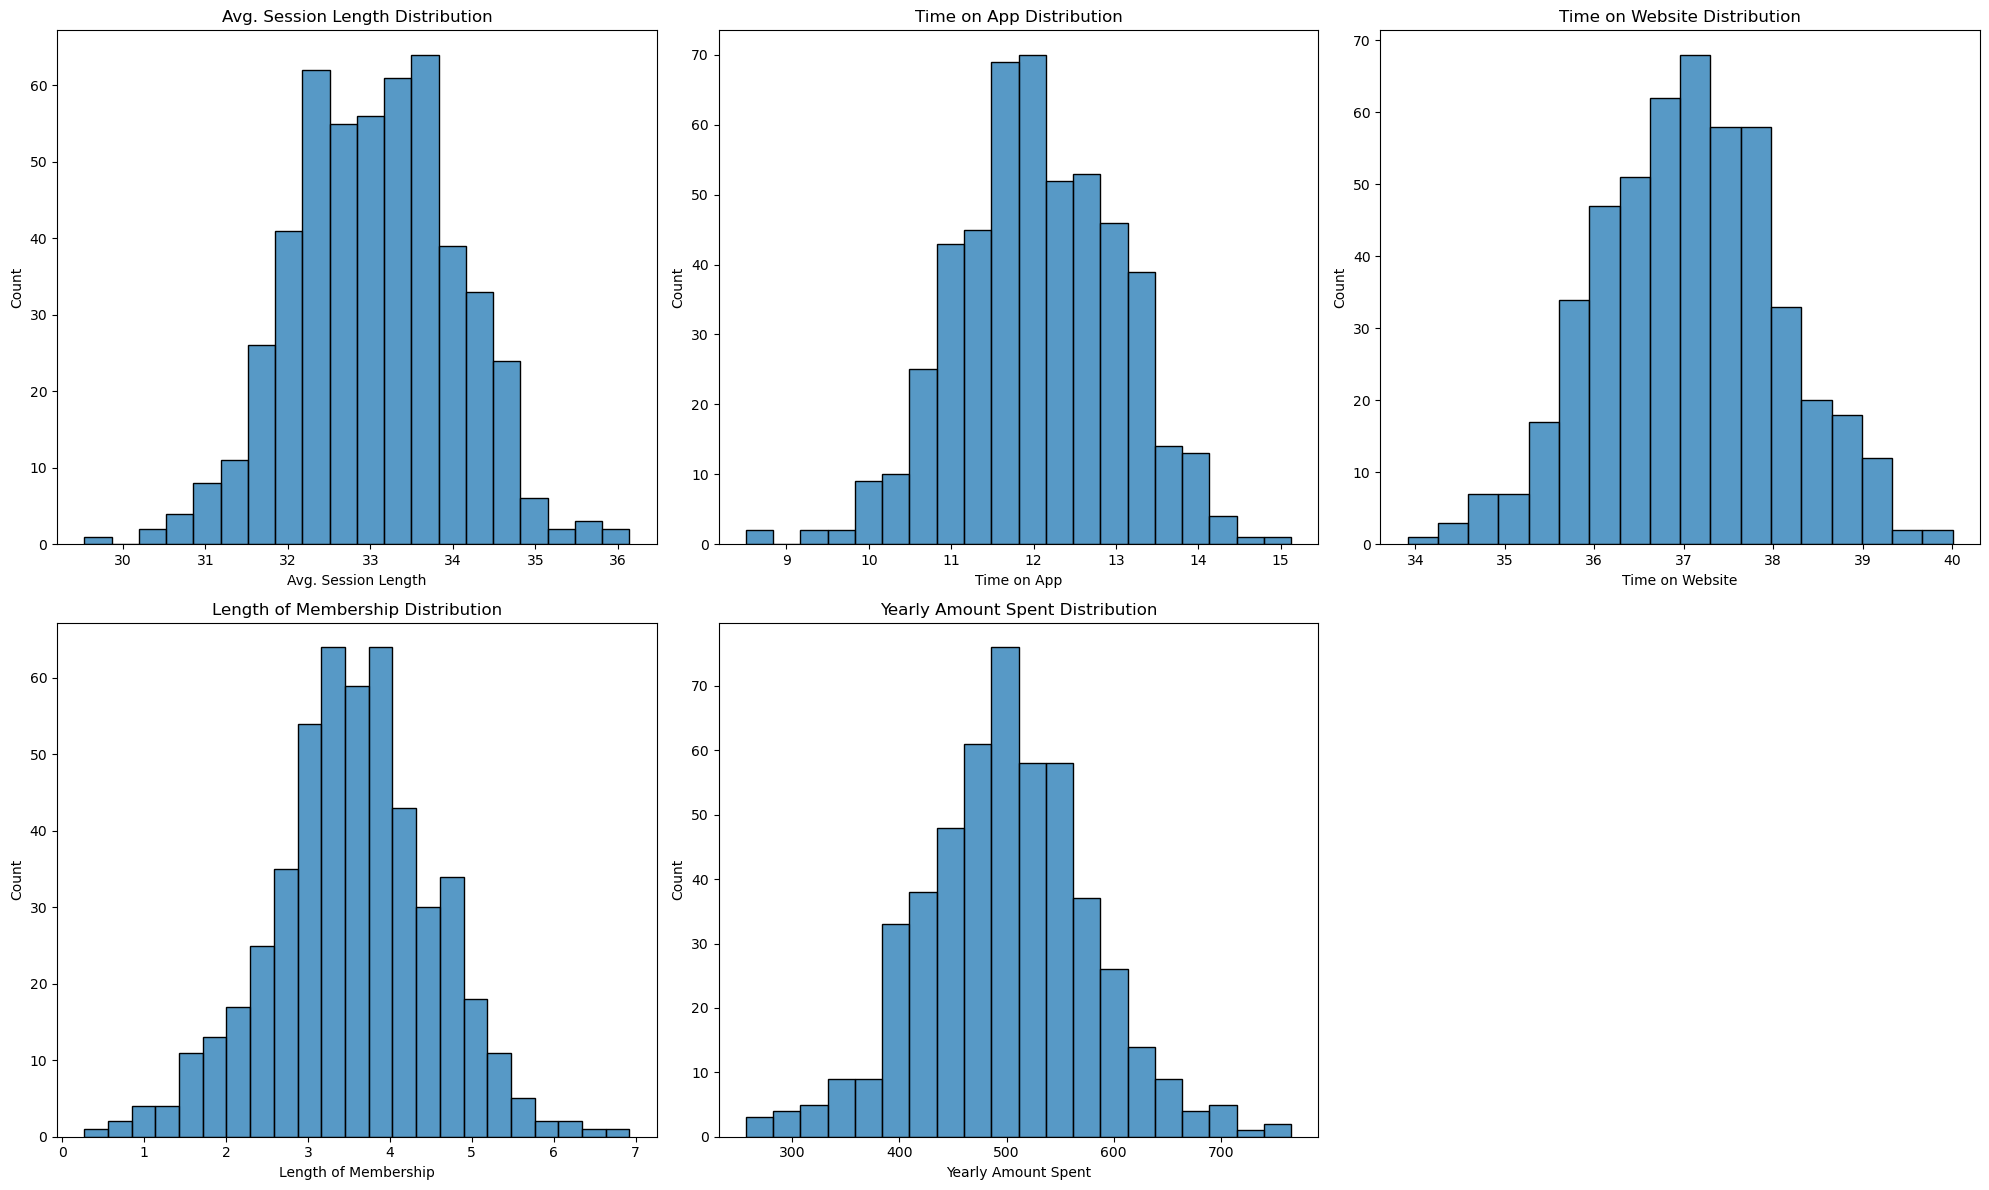

In [21]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(20, 12))

# Histograms of Numerical Features
plt.subplot(2, 3, 1)
sns.histplot(ecommerce_data['Avg. Session Length'], kde=False)
plt.title('Avg. Session Length Distribution')

plt.subplot(2, 3, 2)
sns.histplot(ecommerce_data['Time on App'], kde=False)
plt.title('Time on App Distribution')

plt.subplot(2, 3, 3)
sns.histplot(ecommerce_data['Time on Website'], kde=False)
plt.title('Time on Website Distribution')

plt.subplot(2, 3, 4)
sns.histplot(ecommerce_data['Length of Membership'], kde=False)
plt.title('Length of Membership Distribution')

plt.subplot(2, 3, 5)
sns.histplot(ecommerce_data['Yearly Amount Spent'], kde=False)
plt.title('Yearly Amount Spent Distribution')

plt.tight_layout()
plt.show()

**Scatter Plots**:
   - **Avg. Session Length vs Yearly Amount Spent**: Look for trends indicating if users who spend more time per session tend to spend more annually.
   - **Time on App vs Yearly Amount Spent**: Check if more time spent on the app correlates with higher yearly spending.
   - **Time on Website vs Yearly Amount Spent**: Examine if time spent on the website has a significant impact on yearly spending.
   - **Length of Membership vs Yearly Amount Spent**: Determine if longer membership durations are associated with higher annual spending.



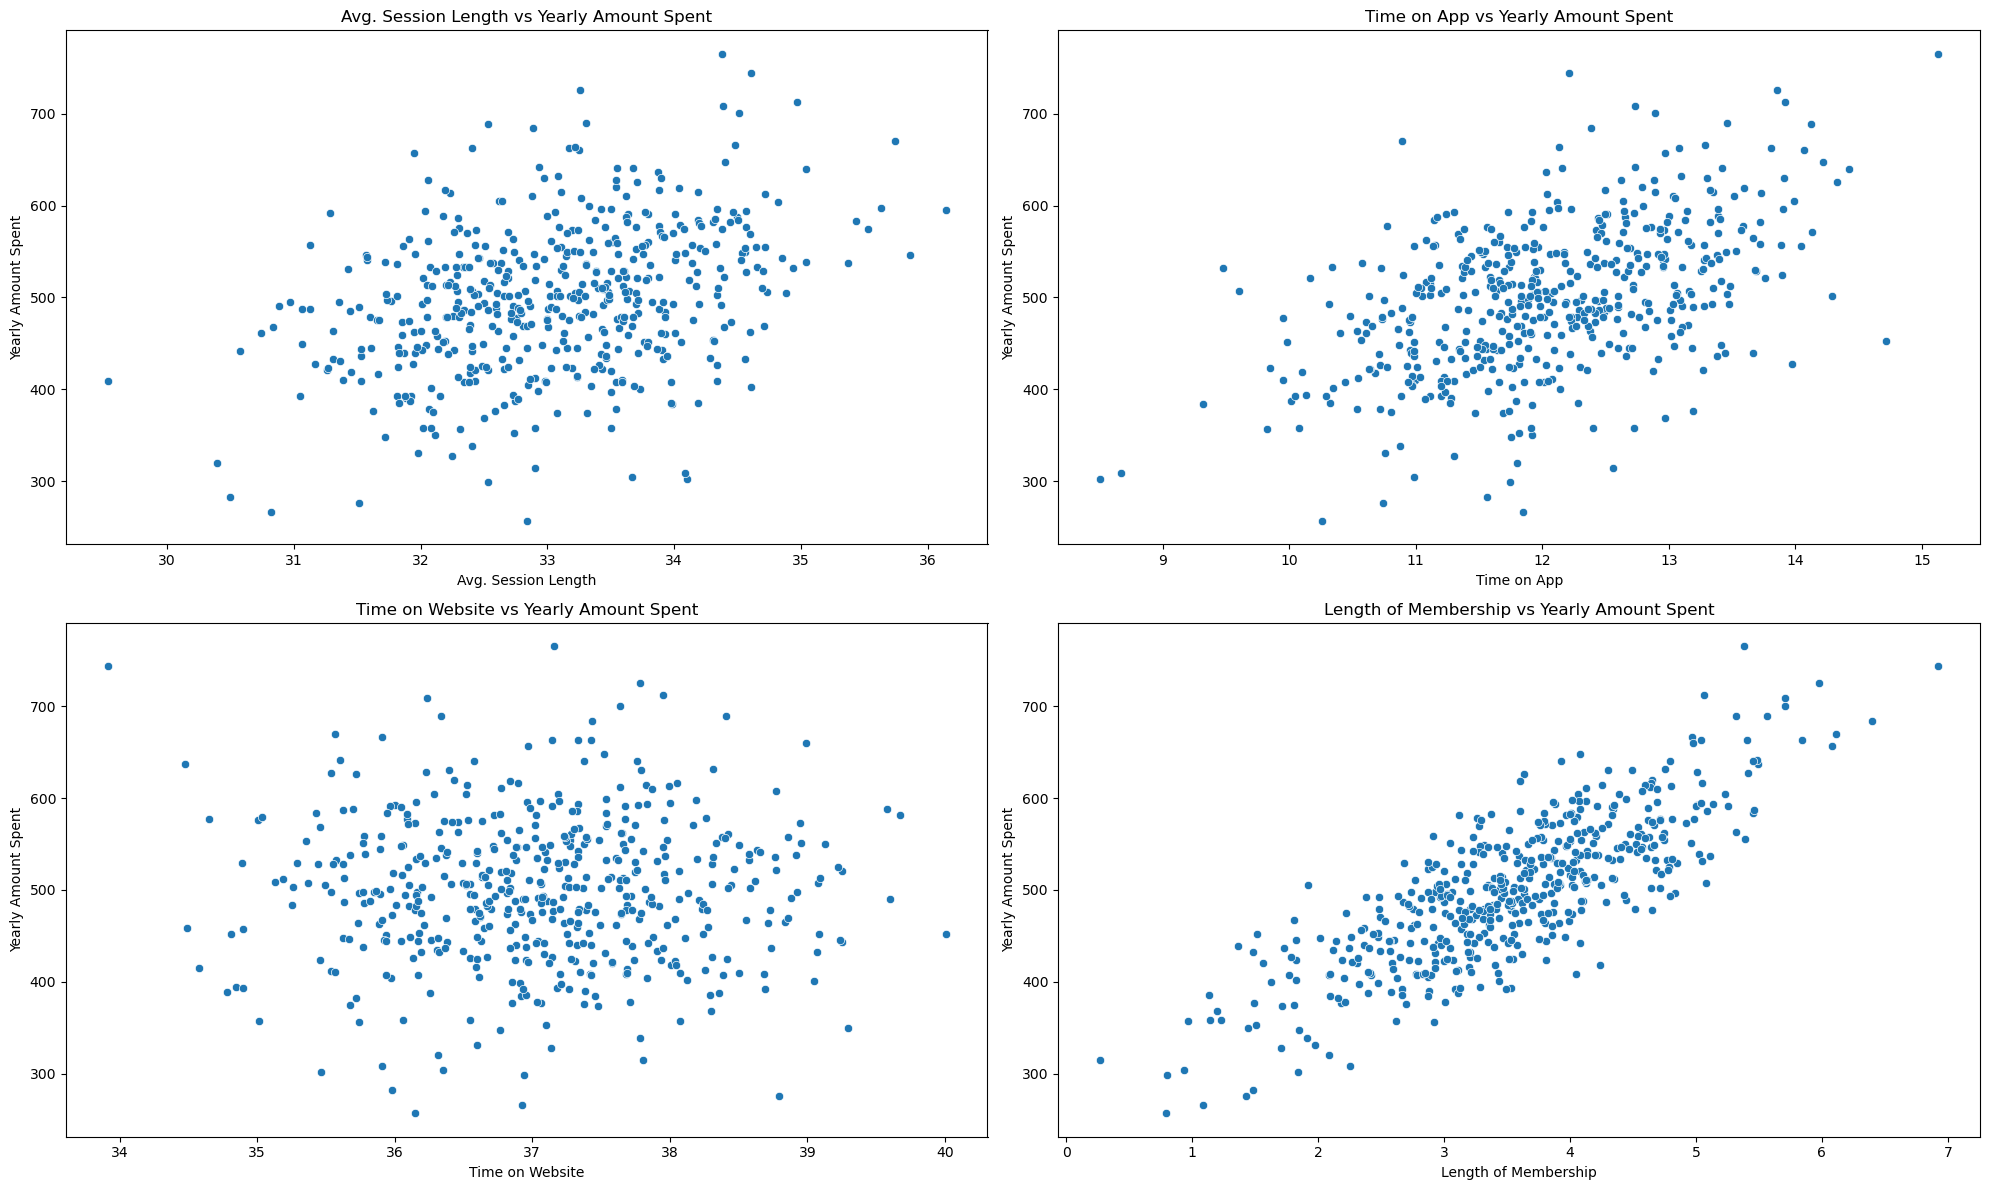

In [25]:
# Scatter plots to visualize relationships
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Avg. Session Length vs Yearly Amount Spent')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Time on App vs Yearly Amount Spent')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Time on Website vs Yearly Amount Spent')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Length of Membership vs Yearly Amount Spent')

plt.tight_layout()
plt.show()

### **Linear Regression Model**

# Load the dataset
ecommerce_data = pd.read_csv("Ecommerce_Customers.csv")

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



In [33]:
# Features and target variable
X = ecommerce_data[['Avg. Session Length','Time on Website','Time on App','Length of Membership']]
y = ecommerce_data['Yearly Amount Spent']



In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [41]:
# Initialize and train the linear regression model
lm = LinearRegression()
model = lm.fit(X_train, y_train)



Training R²: 0.9854
Test R²: 0.9809


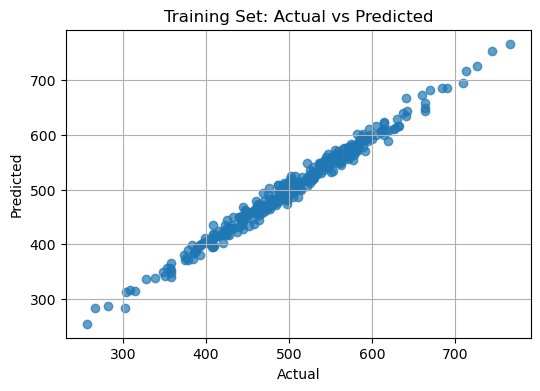

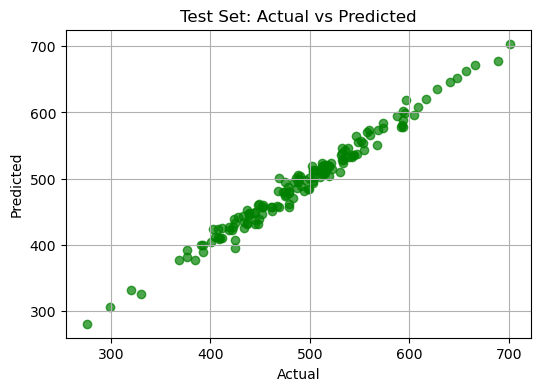

In [45]:
# Model evaluation on training and test sets
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Training set diagnostics
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R²: {r2_train:.4f}")

# Test set diagnostics
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R²: {r2_test:.4f}")

# Plot actual vs predicted for training set
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set: Actual vs Predicted")
plt.grid(True)
plt.show()

# Plot actual vs predicted for test set
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set: Actual vs Predicted")
plt.grid(True)
plt.show()


In [47]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)



In [49]:

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)



Mean Absolute Error: 8.426091641432102
Mean Squared Error: 103.91554136503315
Root Mean Squared Error: 10.193897260863146
R^2 Score: 0.9808757641125856


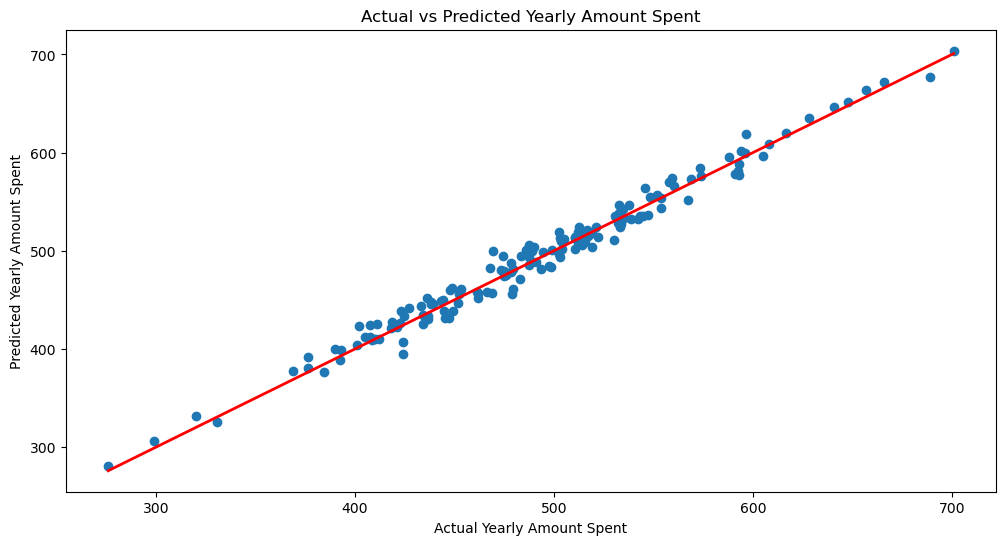

In [51]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.show()


# Student task 

**Train a different model with the same data to see how well it works with the data**.

**Clarification:** 'Training a different model' can mean:
- Using a different regression algorithm (e.g., Decision Tree, Ridge Regression).
- Or training a linear model using a different subset of predictors.
Please specify which direction you want to explore and evaluate the model's performance.